* Loaded Nedded Libraries

In [1]:
import tensorflow as tf      
from tensorflow import keras  
import matplotlib.pyplot as plt    
import numpy as np

* Load Fashion Mnist Data

In [15]:
fashion_mnist=keras.datasets.fashion_mnist
(train_images,train_tables),(test_images,test_labes)=fashion_mnist.load_data()
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat','Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot'] 
print('The Shape Of Train Images Is ==> ',train_images.shape)
print('The Length Of Train Labels Is ==> ',len(train_tables))
print('The Shape Of Test Images Is ==> ',test_images.shape)
print('The Length Of Test Labels Is ==> ',len(test_labes))

The Shape Of Train Images Is ==>  (60000, 28, 28)
The Length Of Train Labels Is ==>  60000
The Shape Of Test Images Is ==>  (10000, 28, 28)
The Length Of Test Labels Is ==>  10000


* Show Random Image

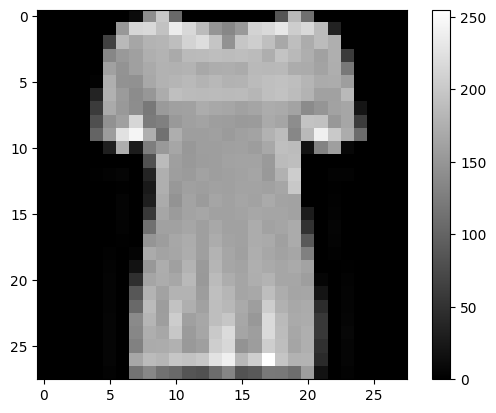

In [17]:
plt.figure()
plt.imshow(train_images[10],cmap='gray')
plt.colorbar()
plt.grid(False)
plt.show()

* Applying Normailizaion

In [18]:
#Make Normalization 
train_images =tf.keras.utils.normalize(train_images,axis=1)
#Or train_images = train_images/255.0
test_images =tf.keras.utils.normalize(test_images,axis=1)
#Or test_images = test_images/255.0

* Display Random 40 Images

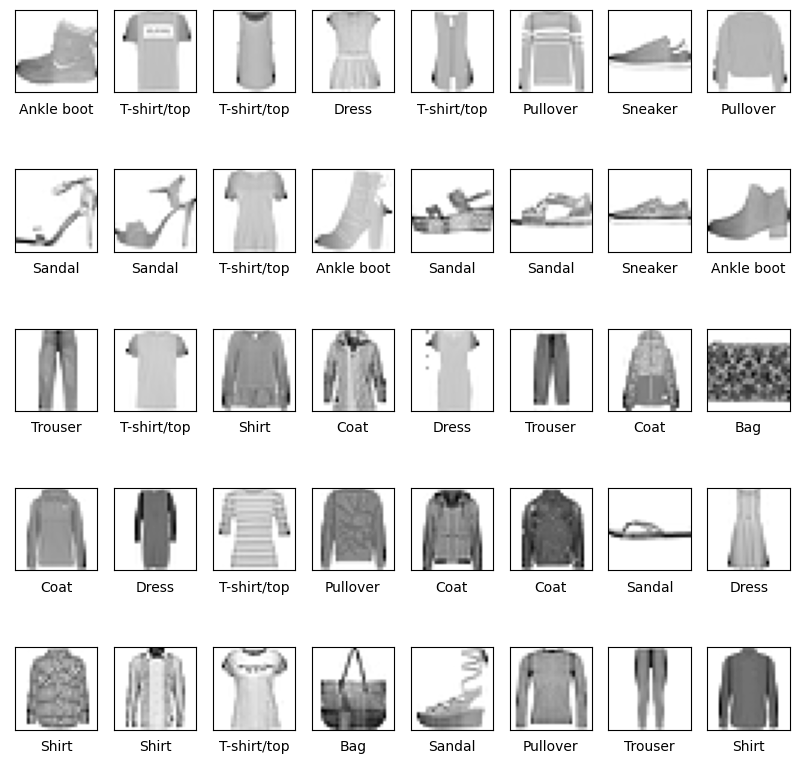

In [20]:
plt.figure(figsize=(10,10))
for i in range(40):
    plt.subplot(5,8,i+1)#Detect numbers of rows and cols ==> rows = 5 , cols = 8 , step = 1
    plt.xticks([])# Xticks Used ==> It is commonly used to customize the appearance of the x-axis in a plot.
    plt.yticks([])#the yticks function is used to set the tick locations and labels along the y-axis.
    plt.grid(False)# We then use plt.grid(False) to turn off the grid lines on the plot. Finally, we use plt.show() to display the plot.
    plt.imshow(train_images[i],cmap=plt.cm.binary)
    plt.xlabel(class_names[train_tables[i]])
plt.show()

* Bulid Neural Networks 
1. First Output Layer Contain 10 Values ==> Used Softmax Function 
2. input data = 28 *28 
3. i need create 4 hidden layers and  output layer

In [22]:
model =tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten())#Convert Matrix To Vector
model.add(tf.keras.layers.Dense(512,activation=tf.nn.relu))#create first hidden layer
model.add(tf.keras.layers.Dropout(0.15))#Make Drop 15 % From Data
model.add(tf.keras.layers.Dense(256,activation=tf.nn.relu))#create Second Hidden Layer 
model.add(tf.keras.layers.Dense(128,activation=tf.nn.relu))#create third Hidden layer 
model.add(tf.keras.layers.Dense(64,activation=tf.nn.relu))#create Fourth Hidden Layer
model.add(tf.keras.layers.Dense(10,activation=tf.nn.softmax))#create Output Layer

* Make Customization
* Make Training For Model

In [26]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model.fit(train_images,train_tables,epochs=20)

Epoch 1/20
1875/1875 [==============================] - 14s 7ms/step - loss: 0.2402 - accuracy: 0.9100
Epoch 2/20
1875/1875 [==============================] - 14s 7ms/step - loss: 0.2302 - accuracy: 0.9140
Epoch 3/20
1875/1875 [==============================] - 14s 7ms/step - loss: 0.2239 - accuracy: 0.9163
Epoch 4/20
1875/1875 [==============================] - 14s 7ms/step - loss: 0.2181 - accuracy: 0.9179
Epoch 5/20
1875/1875 [==============================] - 14s 7ms/step - loss: 0.2119 - accuracy: 0.9198
Epoch 6/20
1875/1875 [==============================] - 13s 7ms/step - loss: 0.2072 - accuracy: 0.9207
Epoch 7/20
1875/1875 [==============================] - 13s 7ms/step - loss: 0.2014 - accuracy: 0.9234
Epoch 8/20
1875/1875 [==============================] - 13s 7ms/step - loss: 0.1981 - accuracy: 0.9254
Epoch 9/20
1875/1875 [==============================] - 13s 7ms/step - loss: 0.1937 - accuracy: 0.9259
Epoch 10/20
1875/1875 [==============================] - 13s 7ms/step - l

* Evaluating Model 
1. Loss Data Evaluate
2. Accuracy Data Evaluate

In [28]:
loss_evaluate,accuracy_evaluate=model.evaluate(test_images,test_labes)
print('The Lost Evluate Is ==> ',loss_evaluate *100)
print('The Accuarcy Evluate Is ==> ',accuracy_evaluate *100)

313/313 [==============================] - 1s 3ms/step - loss: 0.3652 - accuracy: 0.8925
The Lost Evluate Is ==>  36.522817611694336
The Accuarcy Evluate Is ==>  89.24999833106995


* Save Model

In [29]:
model.save('2- Keras_NN_Advanced.model')

INFO:tensorflow:Assets written to: 2- Keras_NN_Advanced.model\assets
